<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/HW4_Decision_Tree_and_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/insurance.csv'
df=pd.read_csv(path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [185]:
#To check null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


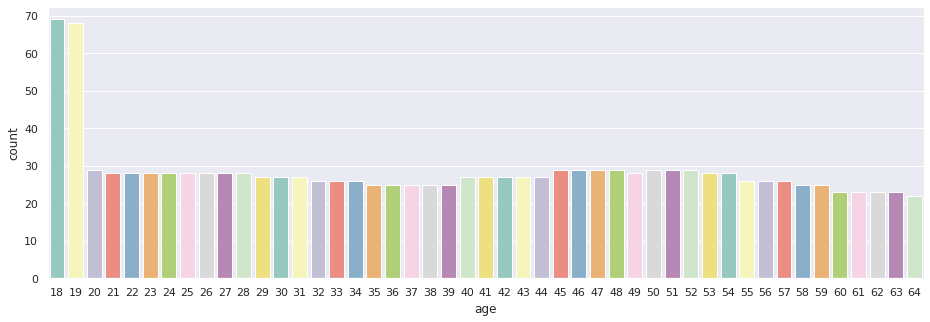

In [187]:
sns.countplot(x='age', data=df, palette="Set3")
from matplotlib import rcParams
rcParams['figure.figsize'] = 15.7,5


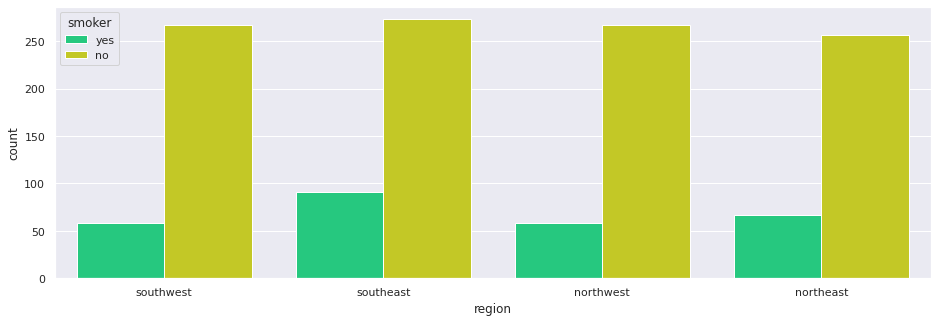

In [188]:
sns.countplot(x='region', hue='smoker', data=df,  palette=['#0be382',"#dce30b"] )
rcParams['figure.figsize'] = 15,5

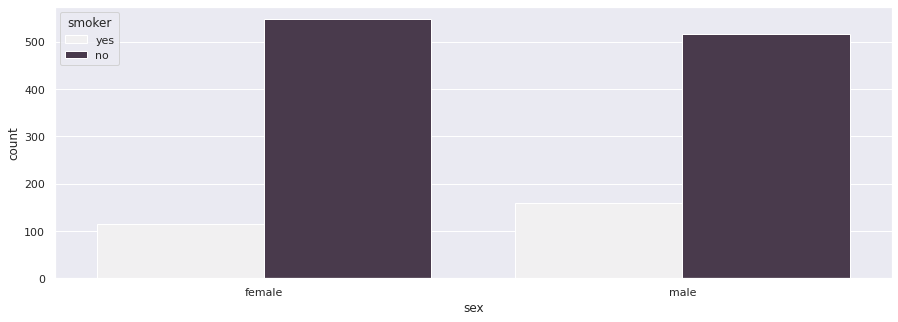

In [189]:
sns.countplot(x='sex', hue='smoker', data=df, color= "#4b374f")
rcParams['figure.figsize'] = 6,4

**USING Loop for LabelEncoding**

In [190]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [191]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])
  

In [192]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [193]:
#Target
y=df['smoker']
y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [194]:
#Feature
X=df.copy()
X=df.drop('smoker', axis=1)
X.head(3)

,age,sex,bmi,children,region,charges
0,19,0,27.90,0,3,16884.9240
1,18,1,33.77,1,2,1725.5523
2,28,1,33.00,3,2,4449.4620


**Splitting Data for Train and Test**

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)


In [196]:
X_train.count()

age         936
sex         936
bmi         936
children    936
region      936
charges     936
dtype: int64

In [197]:
X_test.count()

age         402
sex         402
bmi         402
children    402
region      402
charges     402
dtype: int64

**Decision Tree Algorithm**

In [198]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()



**Fit the train data to the model**

In [199]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [200]:
y_pred = dtc.predict(X_test)

**MODEL ACCURACY and PERFORMANCE MEASUREMENT **

In [201]:
from sklearn.metrics import confusion_matrix

In [202]:
#Predicted result
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [203]:
#Actual result
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled=True, rounded=True, feature_names=X.columns)

In [ ]:
print(tree.export_text(dtc))

**1. Confusion Matrix**

In [207]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[312,  11],
       [  3,  76]])

**Assign the TRUE POSITIVE, FALSE NEGATIVE, FALSE POSITIVE, TRUE NEGATIVE using Confsion Matrix**

In [208]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [209]:
tp

312

In [210]:
fn

11

In [211]:
fp

3

In [212]:
tn

76

**2. Accuracy**

In [213]:
accuracy = (tp+tn)/len(y_test)
accuracy= accuracy*100
accuracy

96.51741293532339

In [214]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy=accuracy*100
accuracy

96.51741293532339

In [215]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
accuracy=accuracy*100
accuracy

96.51741293532339

**3. Precision or Positive Predictive Value (PPV)**



In [216]:
precision= tp/(tp+fp)
precision

0.9904761904761905

In [217]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.99047619, 0.87356322])

**4. Sensitivity, Recall, Hit rate or True Positive Rate (TPR)**

In [218]:
recall= tp/(tp+fn)
recall

0.9659442724458205

In [219]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.96594427, 0.96202532])

**5. False Positive Rate (FPR)**

In [220]:
fpr=fp/(fp+tn)
fpr

0.0379746835443038

**6. F1 Measure**

In [221]:
f1_measure= (precision+recall)/2
f1_measure

0.9782102314610055

**7. Harmonic Mean or F1 Score**

In [222]:
F1 = (2 * precision * recall)/(precision + recall)
F1

0.9780564263322885

In [223]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.97805643, 0.91566265])

**8. Specificity, Selectivity or True Negative Rate (TNR)**

In [224]:
specificity= tn/(tn+fp)
specificity

0.9620253164556962

**9. Thread SCore (TS) Or Critical Success Inde(CSI)**



In [225]:
csi = tp/(tp+fn+fp)
csi

0.9570552147239264

**10. False Discovery  Rate (FDR)**

In [226]:
fdr= fp/(tp+fp)
fdr

0.009523809523809525

In [227]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[312,  11],
       [  3,  76]])

**Confusion Matrix Plot**

Text(30.5, 0.5, 'Actual Values')

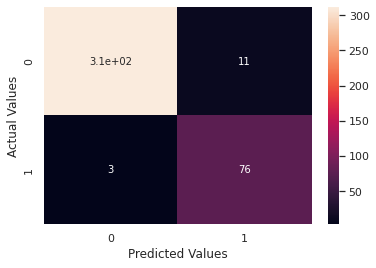

In [228]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**Classification Report Summary**

In [229]:
from sklearn.metrics import classification_report
class_r=classification_report(y_test, y_pred)
print(class_r)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       323
           1       0.87      0.96      0.92        79

    accuracy                           0.97       402
   macro avg       0.93      0.96      0.95       402
weighted avg       0.97      0.97      0.97       402



**ROC and AUC Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


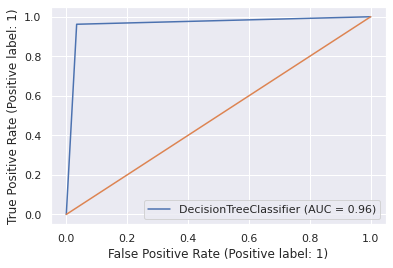

In [230]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc,X_test, y_test)
plt.plot([0,1],[0,1])